In [1]:
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pickle_in = open(os.path.join(os.getcwd(), 'data', 'processed', 'all_data.pickle'), 'rb')
data = pickle.load(pickle_in)

In [ ]:
#keep a copy of the original 
data_orig = data.copy()

In [3]:
data_2000 = data['2000'].copy()
for col in data_2000.keys():
    tmp = data_2000[col]
    tmp = tmp[tmp.columns[1:]].divide(tmp[tmp.columns[0]], axis=0).fillna(0)
    if len(tmp.columns) > 1:
        tmp = tmp.dot(np.arange(1, len(tmp.columns)+1)).to_frame()
    data_2000[col] = tmp

In [4]:
cols = list(data_2000.keys())
dfs = [data_2000[col] for col in cols]
d00 = pd.concat(dfs, axis=1)
d00.columns = cols
d00.head()

,income,education,race,household,rent,value,unemployment
geoid,,,,,,,
48021950100,7.946837,3.617289,0.861927,0.764067,9.660232,11.933833,0.016911
48021950200,7.088651,3.154098,0.675920,0.728203,10.006734,10.657951,0.032848
48021950300,8.219238,3.669384,0.810971,0.741924,10.832512,12.493310,0.029677
48021950400,7.793478,4.075207,0.766053,0.706884,11.403922,12.826984,0.016595
48021950600,7.155233,3.465056,0.889213,0.713953,10.053435,10.868653,0.031087


In [5]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler(feature_range=(0, 1))
d00_sc = mmsc.fit_transform(d00)
d00_sc_df = pd.DataFrame(d00_sc, index=d00.index, columns=d00.columns)

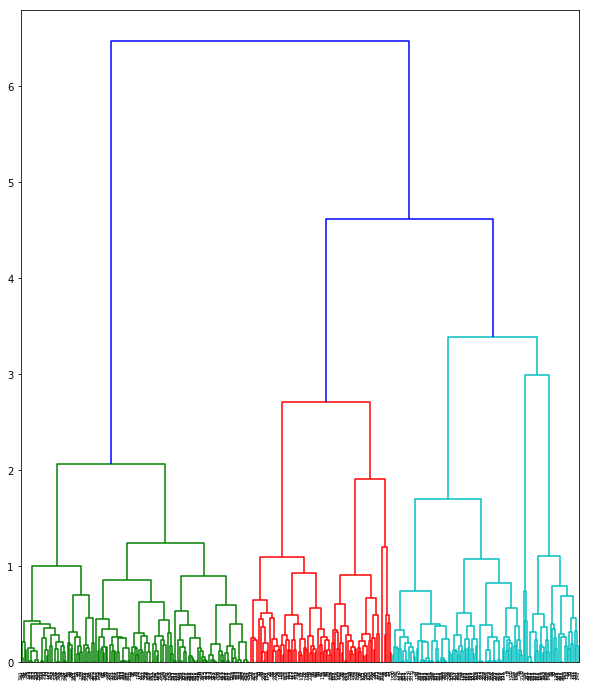

In [6]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 12))
dendrogram = sch.dendrogram(sch.linkage(d00_sc, method='ward'))

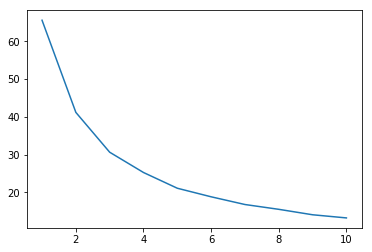

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10)
    kmeans.fit(d00_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

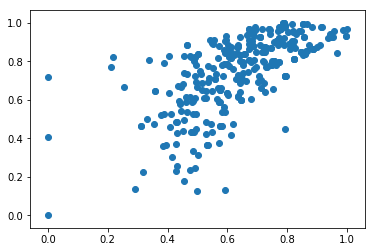

In [153]:
plt.scatter(d00_sc[:, 0], d00_sc[:, 2])

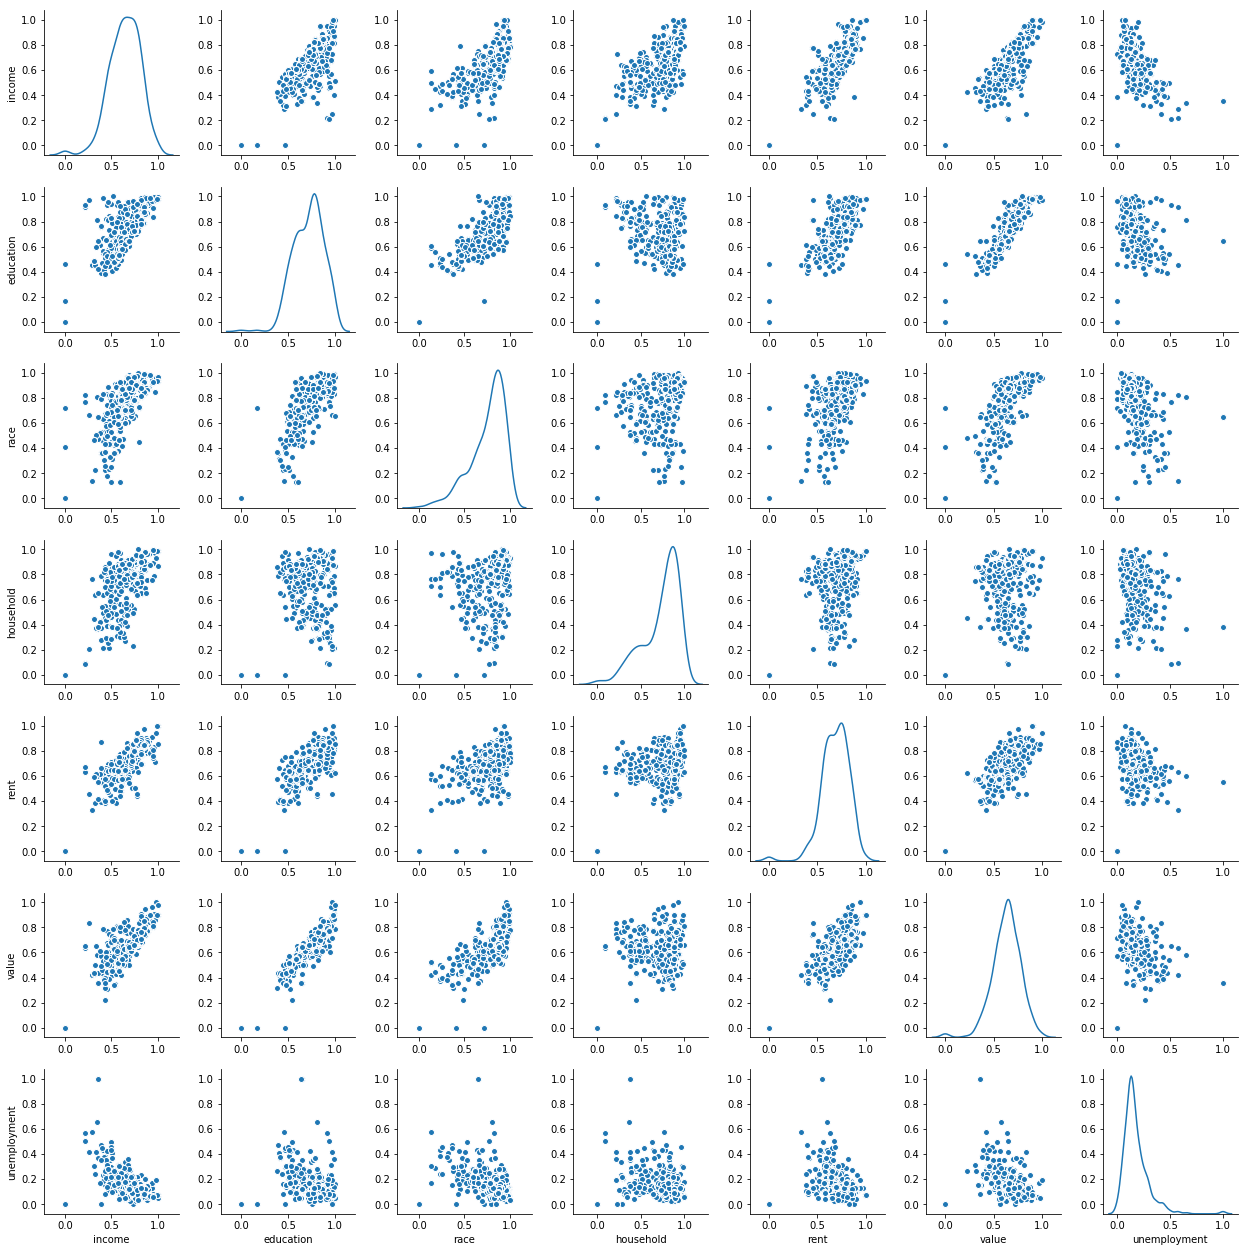

In [8]:
sns.pairplot(d00_sc_df, diag_kind='kde')

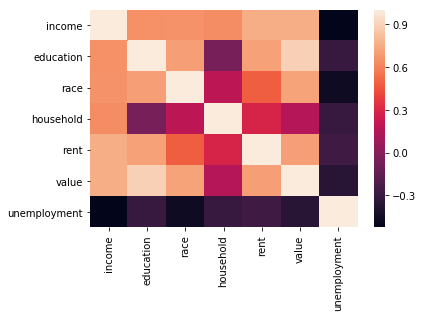

In [9]:
corr = d00_sc_df.corr()
sns.heatmap(corr)

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(d00_sc)
pca.explained_variance_ratio_

array([ 0.57154303,  0.24979652,  0.08568783,  0.05041515,  0.02621036,
        0.00929524,  0.00705186])

In [11]:
pca = PCA(n_components=2)
d00_pca = pca.fit_transform(d00_sc)

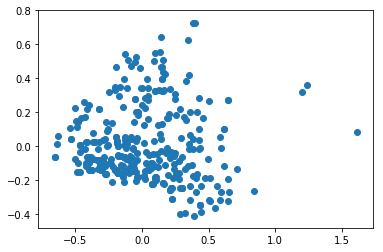

In [12]:
plt.scatter(d00_pca[:, 0], d00_pca[:, 1])

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
pca = PCA(n_components=3)
d00_pca3 = pca.fit_transform(d00_sc)

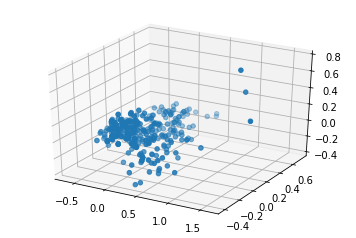

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d00_pca3[:,0], d00_pca3[:, 1], d00_pca3[:, 2])